# **1. Konten**
* [1 Konten](#intro)
* [2 Problem Statement](#data_review)
* [3 Tujuan](#data_review)
* [4 Deskripsi Data](#data_review)
* [Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum](#data_review)
* [Tahap 2. Prapemrosesan Data](#data_review)
* [Tahap 3. Analisis Data Eksploratif (EDA)](#data_review)
* [Tahap 4. Membangun Model untuk Memprediksi Churn Pelanggan](#data_review)
    * [Membagi Data Menjadi Data Training Dan Data Validation](#data_review)
    * [Menguji Algoritma Model](#data_review)
        * [Regresi Logistik](#data_review)
        * [Random Forest](#data_review)
* [Tahap 5. Membuat Kluster Pelanggan](#data_review)
    * [Standarisasi Data](#data_review)
    * [Klustering Menggunakan KMeans](#data_review)
* [Tahap 6. Kesimpulan Umum](#data_review)

# **2. Problem Statement**

Waralaba pusat kebugaran yang dikenal dengan nama **Model Fitness** sedang mengembangkan strategi untuk meningkatkan keterlibatan pelanggan berdasarkan data analitik. Salah satu tantangan umum yang sering dihadapi oleh bisnis pusat kebugaran seperti **Model Fitness** adalah hilangnya pelanggan atau *customer churn*. Bagaimana manajemen bisa mengetahui ketika seorang pelanggan telah berhenti menggunakan layanan? Salah satu cara mungkin adalah dengan menghitung jumlah orang yang menghapus akun atau tidak memperbarui langganan. Namun, terkadang sulit untuk benar-benar mengetahui apakah seseorang sudah berhenti. Ada kemungkinan mereka berhenti tanpa memberitahu kita. Ini berarti bahwa strategi semacam ini mungkin tidak efisien untuk memprediksi *customer churn*.

Di pusat kebugaran, biasanya pelanggan dapat dianggap telah berhenti jika mereka tidak datang selama satu bulan. meskipun hal ini tidak selalu akurat. Terkadang, seorang pelanggan mungkin tidak datang karena sedang liburan, misalnya ke Bali, dan mereka akan kembali setelah liburan selesai. Meskipun jarang terjadi, jika seorang pelanggan bergabung, datang beberapa kali, dan kemudian tidak datang lagi, kemungkinan besar mereka tidak akan kembali.

**Model Fitness** ingin mengurangi tingkat churn dengan menerapkan digitalisasi pada profil pelanggan. Tugas kami adalah menganalisis profil-profil ini dan mengembangkan strategi untuk mempertahankan pelanggan.

# **3. Tujuan**

Tugas kami meliputi:
1. Memprediksi kemungkinan pelanggan berhenti (churn) **di bulan berikutnya**
2. Membuat **segmentasi pengguna** dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
3. **Menganalisis faktor yang paling memengaruhi churn**
4. Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
    * Mengidentifikasi kelompok target
    * Merekomendasikan langkah-langkah untuk mengurangi churn
    * Menjelaskan pola lain yang ditemui terkait interaksi pelanggan

# **4. Deskripsi Data**

* Churn : churn aktual untuk bulan terkait

* Data pengguna dari bulan sebelumnya:
    * gender : Jenis kelamin pelanggan
    * Near_Location : Menyatakan apakah pelanggan tinggal atau bekerja dekat dengan lokasi pusat kebugaran
    * Partner : apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
    * Promo_friends : Menunjukkan apakah pelanggan mendaftar melalui program "ajak teman" dengan menggunakan kode promo teman
    * Phone : Mengindikasikan apakah pelanggan memberikan nomor telepon mereka
    * Age : Usia pelanggan
    * Lifetime : Waktu (dalam bulan) sejak pelanggan pertama kali mengunjungi pusat kebugaran

* Data dari log kunjungan dan pembelian, serta status keanggotaan saat ini:
    * Contract_period : Durasi kontrak pelanggan, bisa 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
    * Month_to_end_contract : Jumlah bulan tersisa sebelum kontrak pelanggan berakhir
    * Group_visits : Menunjukkan apakah pelanggan mengambil bagian dalam sesi kelompok
    * Avg_class_frequency_total : Rata-rata frekuensi kunjungan per minggu sepanjang masa keanggotaan pelanggan
    * Avg_class_frequency_current_month : Rata-rata frekuensi kunjungan per minggu selama bulan berjalan
    * Avg_additional_charges_total : Total biaya tambahan yang dikeluarkan pelanggan untuk layanan di pusat kebugaran seperti kafe, perlengkapan olahraga, kosmetik, dan lainnya

# **Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum**

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import joblib

In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Memuat Dataset

raw_data = pd.read_excel('/kaggle/input/gym-churn-us/gym_churn_us.xlsx')
raw_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


# **Tahap 2. Prapemrosesan Data**

In [4]:
# Identifikasi jumlah baris dan kolom

raw_data.shape

(4000, 14)

In [5]:
# Identifikasi informasi umum dataframe

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# identifikasi null values
null_values_exist = raw_data.isnull().any().any()

if null_values_exist:
    print("Ada nilai null dalam dataframe.")
else:
    print("Tidak ada nilai null dalam dataframe.")

# identifikasi null values
raw_data.isnull().sum()

Tidak ada nilai null dalam dataframe.


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
# Identifikasi duplikat dalam dataframe
duplicates_exist = raw_data.duplicated().any()

if duplicates_exist:
    print("Ada duplikat dalam dataset.")
else:
    print("Tidak ada duplikat dalam dataset.")

# Jumlah duplikat pada data
raw_data.duplicated().sum()
print('Teridentifikasi sebanyak', raw_data.duplicated().sum(), 'duplikat pada dataset.')

Tidak ada duplikat dalam dataset.
Teridentifikasi sebanyak 0 duplikat pada dataset.


In [8]:
# Mengubah nama kolom menjadi huruf kecil
raw_data.columns = raw_data.columns.str.lower()
raw_data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


**Kesimpulan :**

* Dataset ini terdiri dari 4000 entri/baris
* Terdapat 14 kolom dalam dataset
* Dataset memuat 2 jenis tipe data utama, yaitu int64 (integer) dan float64 (floating-point number)
* Tidak terdapat nilai yang hilang (null) dalam kolom-kolom tersebut
* Tidak terdapat duplikat pada data

# **Tahap 3. Analisis Data Eksploratif (EDA)**

In [9]:
eda = raw_data.copy()

In [10]:
# Menampilkan ringkasan statistik dari dataset eda

eda.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


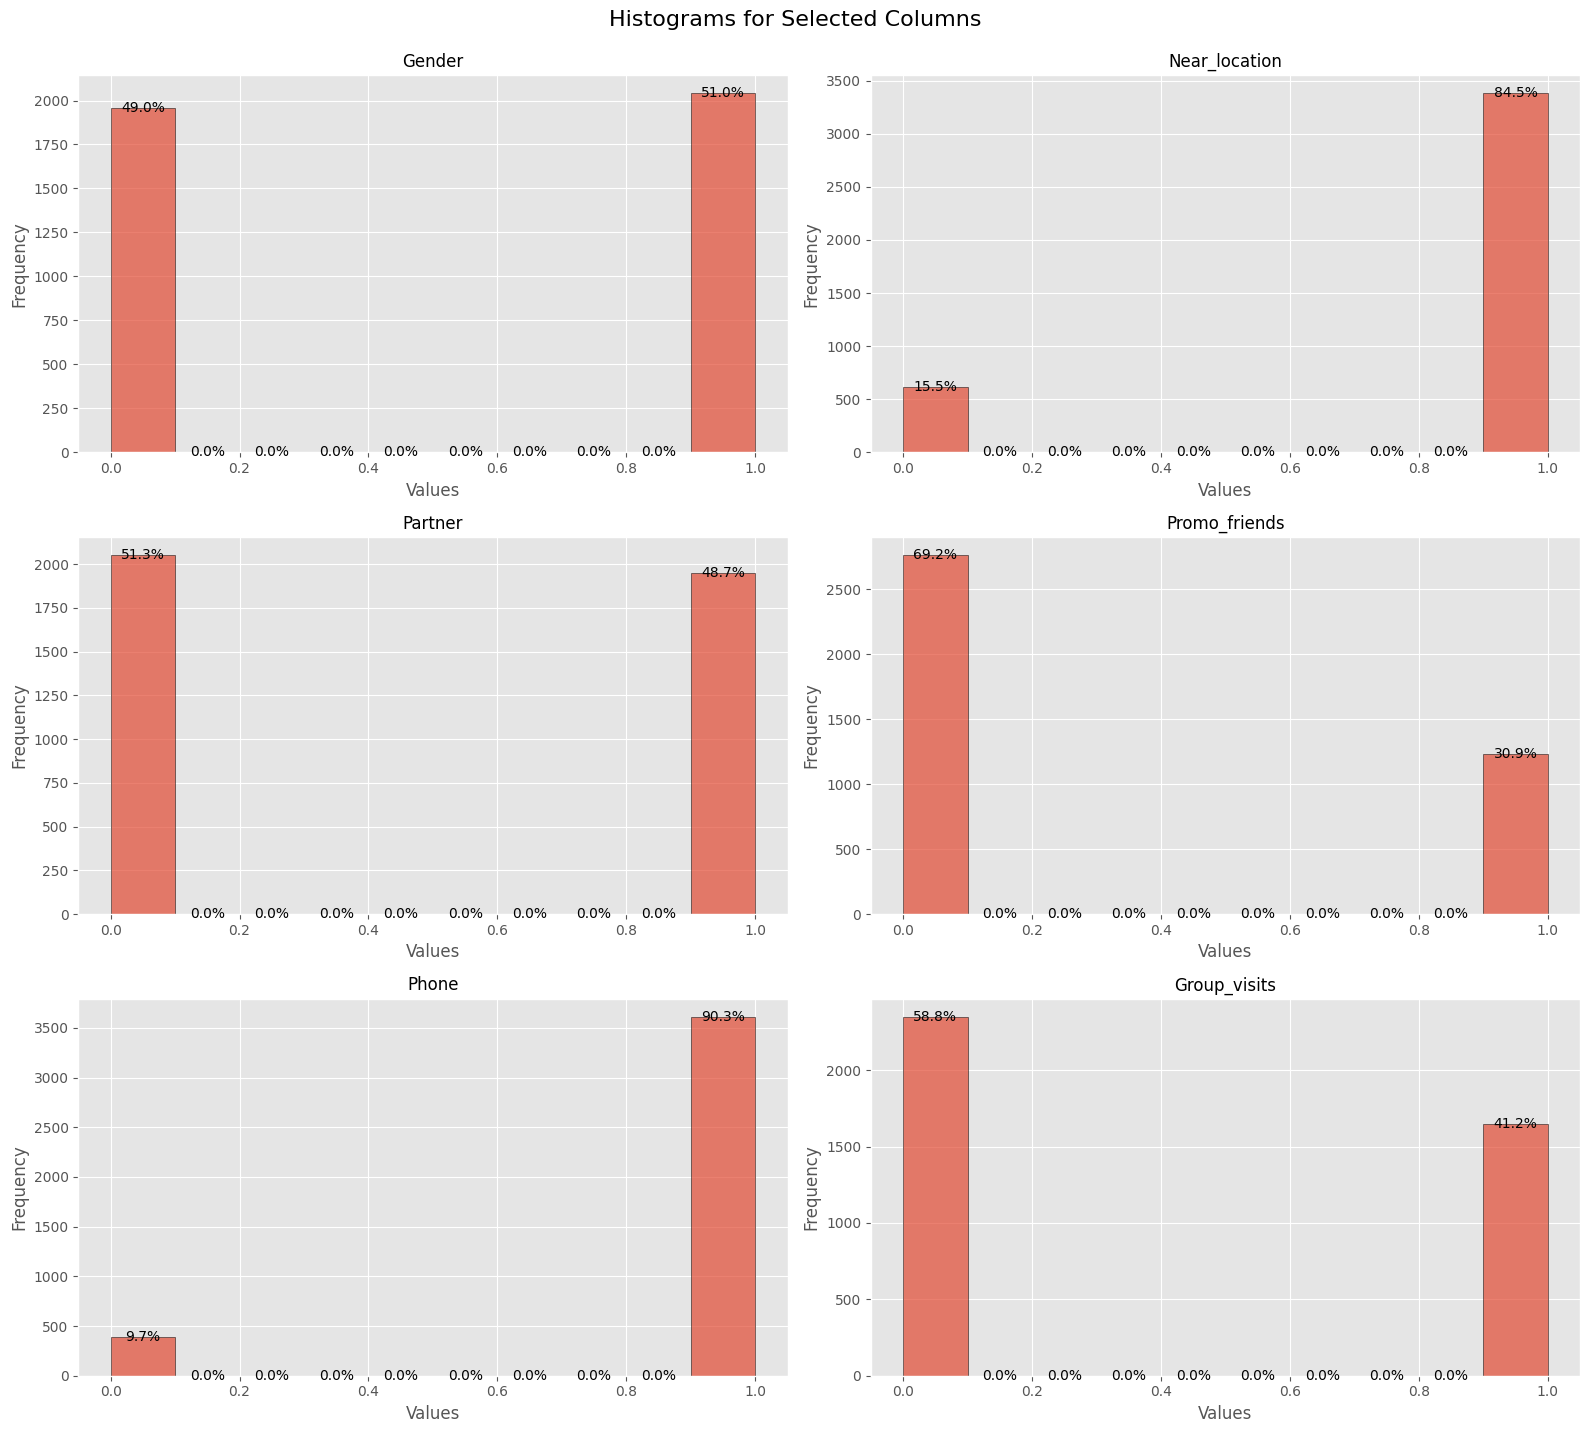

In [11]:
# Memvisualisasikan distribusi data dari variabel-variabel yang bertipe data biner
biner = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

# Mengatur gaya visual
plt.style.use('ggplot')

# Membuat histogram untuk setiap kolom yang dipilih
plt.figure(figsize=(16, 14))

# Menggunakan loop untuk membuat histogram yang lebih kompleks
for idx, col in enumerate(biner, start=1):
    plt.subplot(3, 2, idx)
    eda[col].hist(bins=10, edgecolor='black', alpha=0.7, )
    plt.title(col.capitalize(), fontsize=12)
    plt.xlabel("Values")
    plt.ylabel("Frequency")

    # Menambahkan anotasi persentase
    total_count = len(eda[col])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format((p.get_height() / total_count) * 100)
        plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.tight_layout()

# Menambahkan judul keseluruhan
plt.suptitle("Histograms for Selected Columns", y=1.02, fontsize=16)

# Menampilkan plot
plt.show()

In [12]:
# Memilih kolom-kolom untuk dibuat histogram (kolom non biner)

non_biner = [col for col in eda.columns if eda[col].nunique() > 2]
non_biner

['contract_period',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

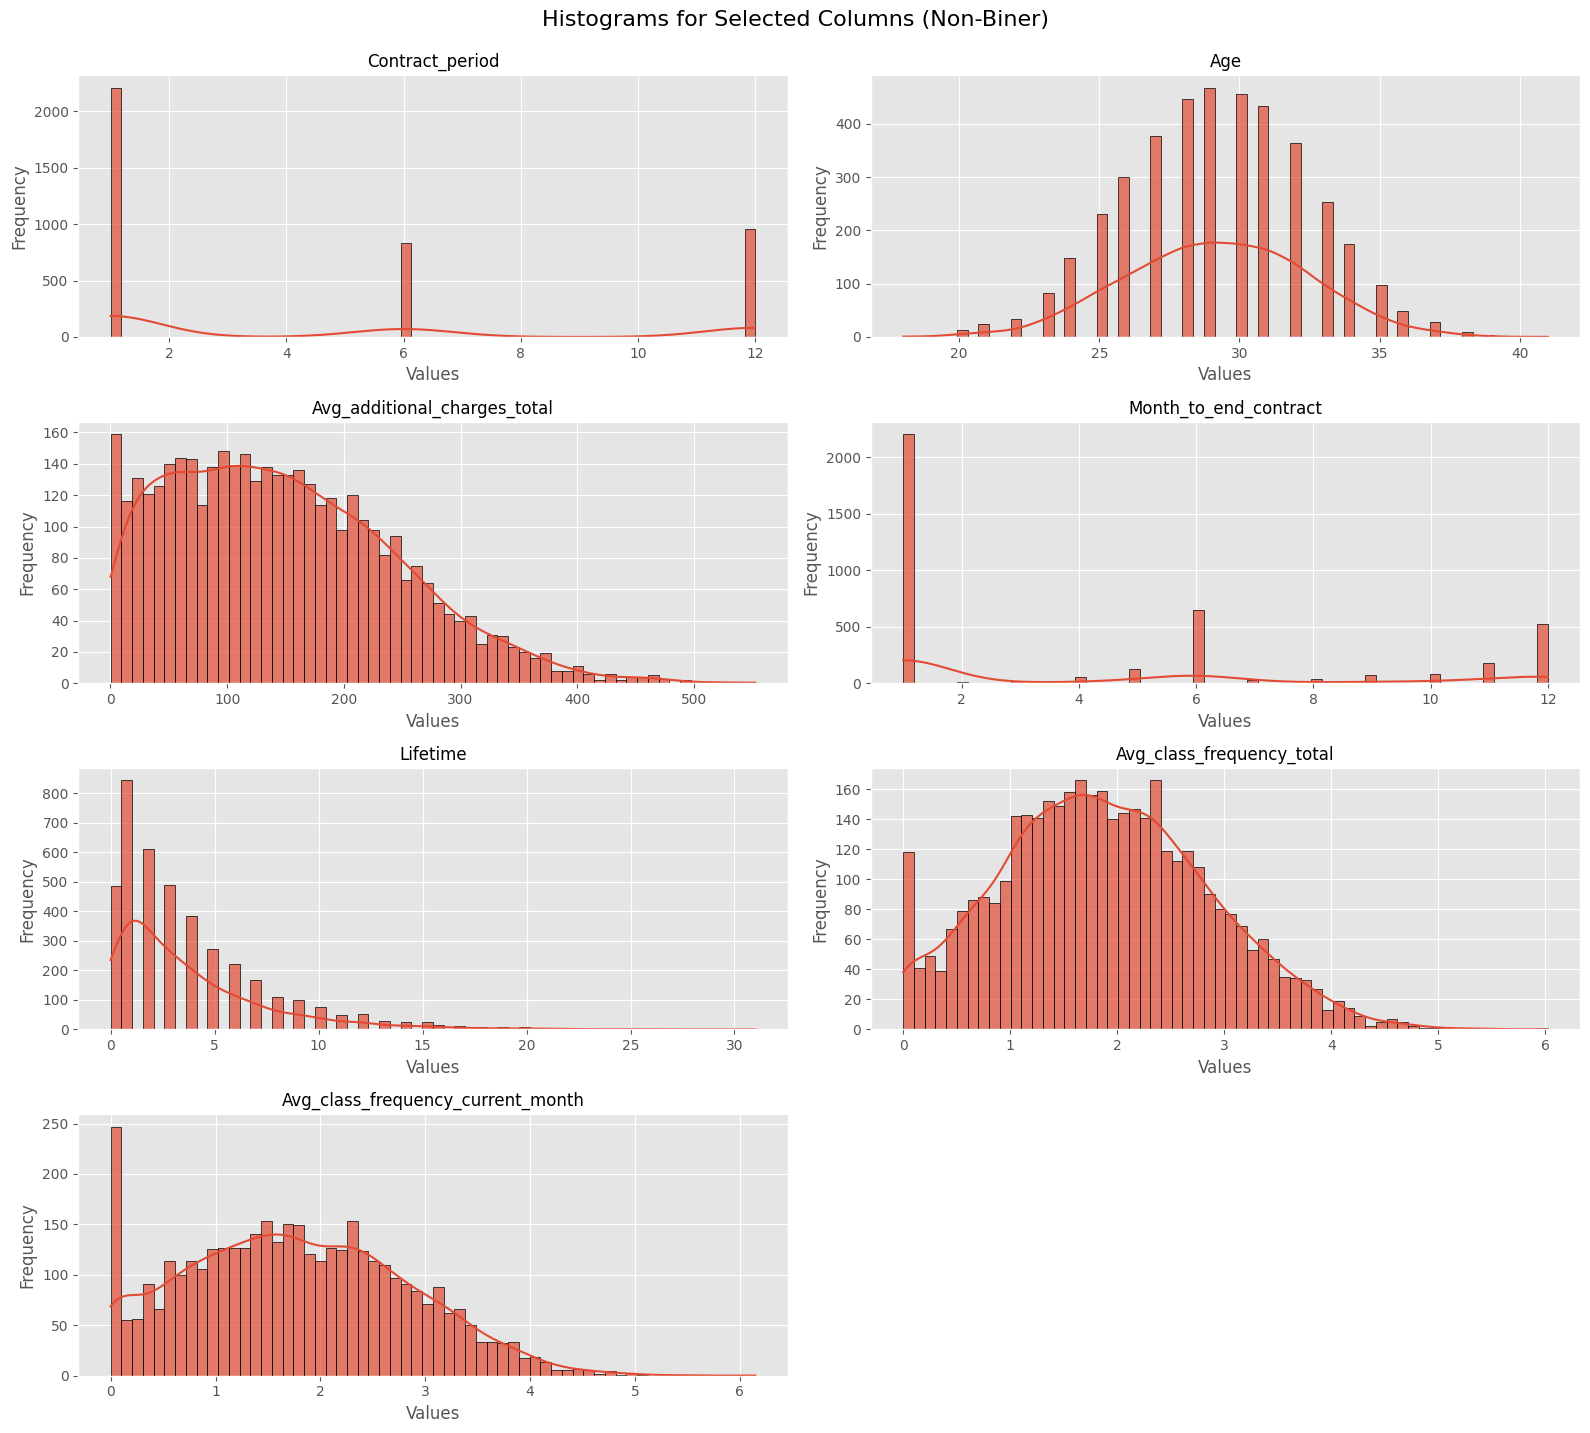

In [13]:
# # Memvisualisasikan distribusi data dari variabel-variabel yang bertipe data non-biner
plt.style.use('ggplot')

# Membuat histogram untuk setiap kolom yang dipilih
plt.figure(figsize=(16, 14))

# Menggunakan loop untuk membuat histogram yang lebih kompleks
for idx, col in enumerate(non_biner, start=1):
    plt.subplot(4, 2, idx)
    sns.histplot(data=eda, x=col, bins=60, edgecolor='black', alpha=0.7, kde=True)
    plt.title(col.capitalize(), fontsize=12)
    plt.xlabel("Values")
    plt.ylabel("Frequency")

# Mengatur jarak antara grafik
plt.tight_layout()

# Menambahkan judul keseluruhan
plt.suptitle("Histograms for Selected Columns (Non-Biner)", y=1.02, fontsize=16)

# Menampilkan plot
plt.show()

**Kesimpulan :**

Pusat kebugaran menarik perhatian baik dari pelanggan pria maupun wanita, dengan proporsi yang hampir seimbang antara keduanya. Lokasi pusat kebugaran memiliki keuntungan, karena sebagian besar pelanggan tinggal atau bekerja dekat dengan pusat kebugaran tersebut, memungkinkan akses yang lebih mudah. Setengah dari pelanggan memilih untuk tidak bergabung melalui program kemitraan, menunjukkan preferensi beragam dalam memilih jenis keanggotaan. Pelanggan cenderung tidak aktif dalam program "ajak teman", menunjukkan potensi peningkatan dalam upaya pemasaran berbasis rekomendasi. Pelanggan cenderung responsif terhadap komunikasi melalui nomor telepon, menunjukkan preferensi untuk interaksi langsung. Partisipasi dalam sesi grup belum menjadi tren umum, memberikan peluang untuk meningkatkan partisipasi dengan manfaat lebih jelas. Mayoritas pelanggan memilih kontrak berdurasi satu tahun, menggambarkan keinginan untuk kenyamanan dan stabilitas jangka panjang. Usia pelanggan yang bervariasi mencerminkan daya tarik pusat kebugaran untuk berbagai kelompok usia, dengan rata-rata usia pelanggan sekitar 29 tahun. Biaya tambahan yang dikeluarkan pelanggan menunjukkan minat dalam layanan tambahan yang ditawarkan oleh pusat kebugaran. Waktu hingga akhir kontrak sekitar 4,3 bulan menunjukkan peluang untuk memperkuat retensi dan keterlibatan pelanggan dalam jangka pendek. Mayoritas pelanggan merupakan pelanggan baru, memberikan potensi pertumbuhan yang signifikan. Waktu sejak kunjungan terakhir sekitar 4 bulan, yang mengisyaratkan pentingnya konsistensi kunjungan dan interaksi dengan pelanggan. Frekuensi kunjungan per minggu tetap stabil di angka 2 kali dalam seminggu, baik selama masa keanggotaan mereka maupun dalam 1 bulan terakhir, menunjukkan adanya pola rutin dalam berolahraga.

In [14]:
# Mengelompokkan data berdasarkan kolom 'Churn' dan menghitung nilai rata-ratanya
churn_ = eda.groupby('churn').mean()
churn_.round(2).T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


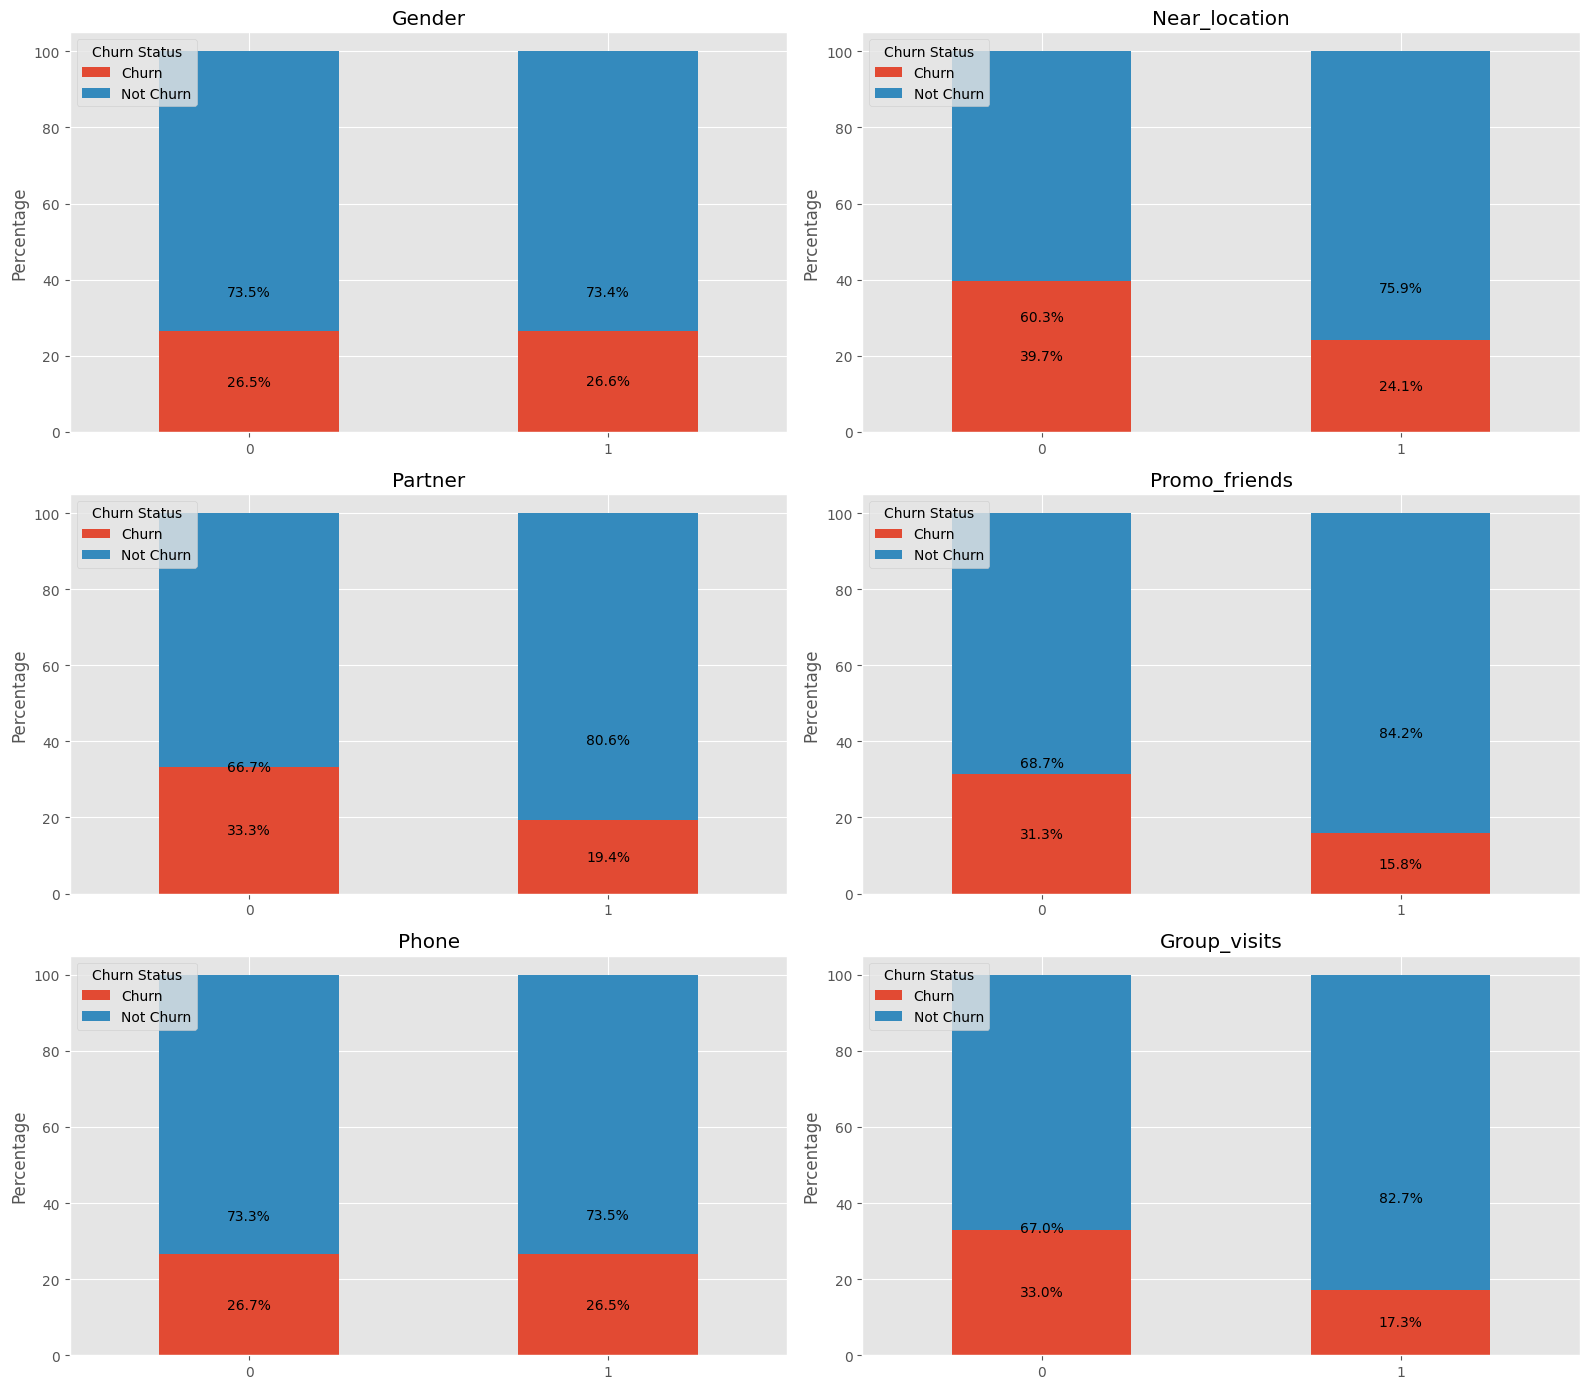

In [15]:
# Memvisualisasikan distribusi data dari variabel bertipe biner terhadap status churn
plt.style.use('ggplot')

# Membuat subplot 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))

# Kolom-kolom yang akan diplot
columns_to_plot = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

# Mapping untuk legenda
churn_mapping = {0: 'Not Churn', 1: 'Churn'}

# Loop melalui setiap subplot dan membuat bar chart
for i, ax in enumerate(axes.flatten()):
    if i < len(columns_to_plot):
        column = columns_to_plot[i]
        value_counts = eda.groupby([column, 'churn']).size().unstack()
        percentage = value_counts.div(value_counts.sum(axis=1), axis=0) * 100
        percentage = percentage[[1, 0]]  # Menukar urutan kolom
        plot = percentage.plot(kind='bar', stacked=True, ax=ax, rot=0)
        ax.set_title(column.capitalize())
        ax.set_xlabel('')
        ax.set_ylabel('Percentage')
        ax.legend([churn_mapping[1], churn_mapping[0]])  # Menyusun legenda sesuai urutan
        ax.legend([churn_mapping[x] for x in percentage.columns], title='Churn Status', loc='upper left')

        # Menambahkan anotasi persentase
        for j in range(len(percentage)):
            for k in range(len(percentage.columns)):
                value = f"{percentage.iloc[j, k]:.1f}%"
                ax.annotate(value, xy=(j, percentage.iloc[j, k] / 2), ha='center', va='center')

# Menyusun layout
plt.tight_layout()
plt.show()

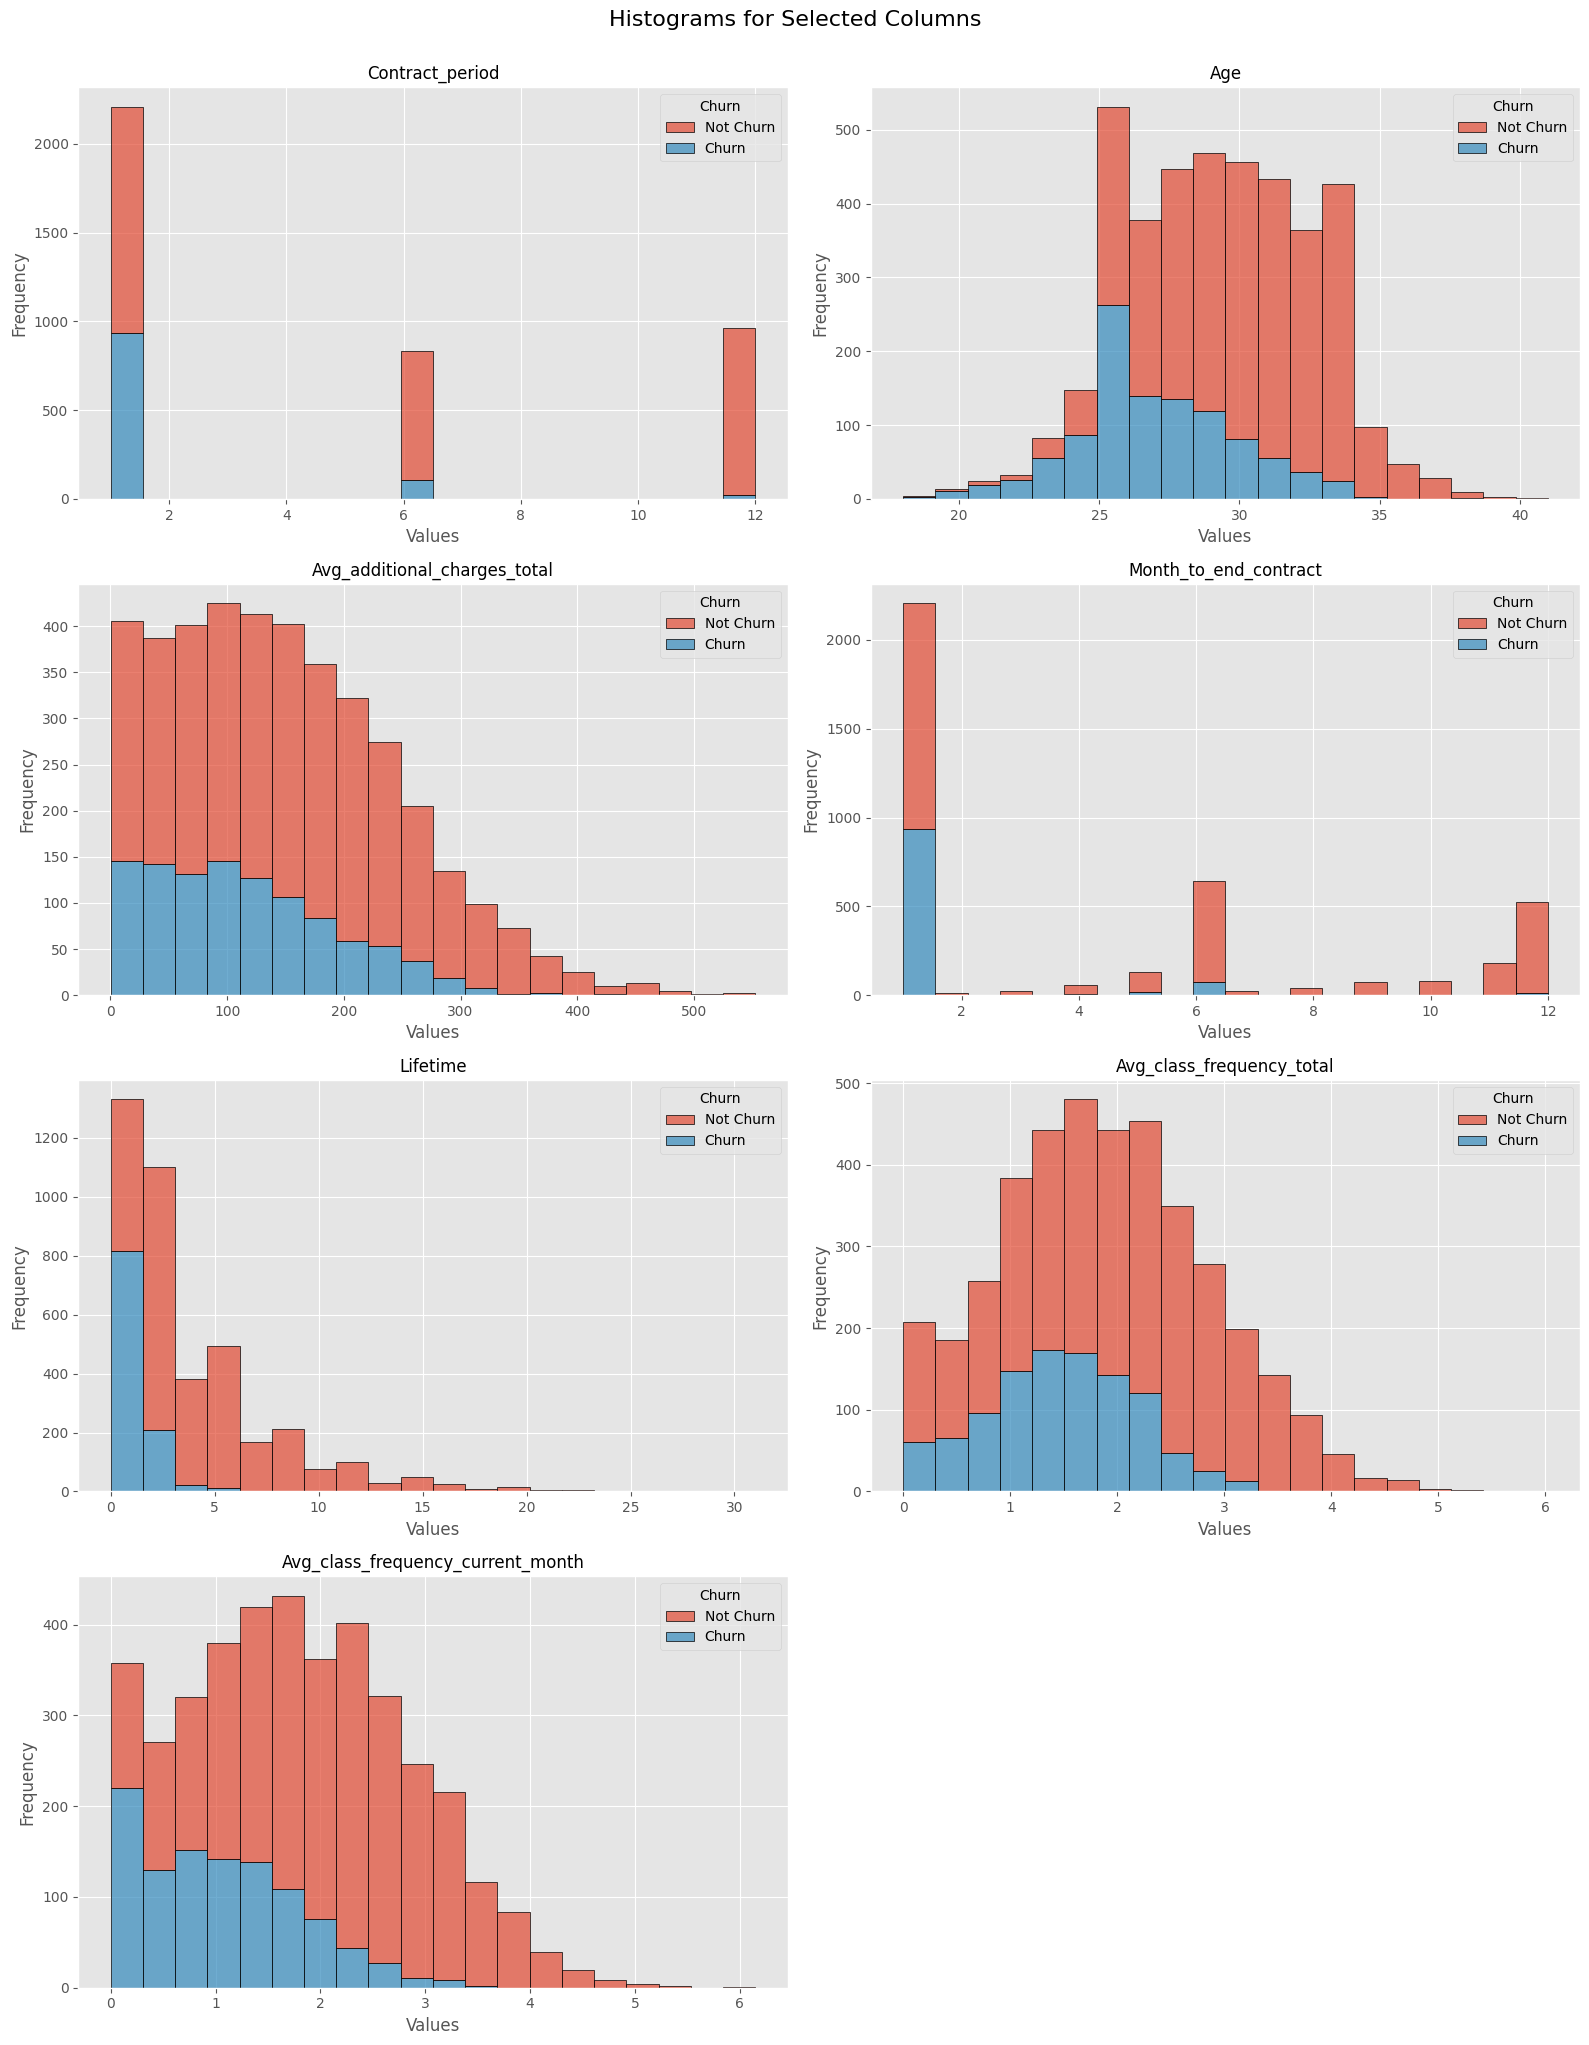

In [16]:
# # Memvisualisasikan distribusi data dari variabel bertipe non-biner terhadap status churn
plt.style.use('ggplot')

# Membuat histogram untuk setiap kolom yang dipilih
plt.figure(figsize=(16, 20))

# Menggunakan loop untuk membuat histogram yang lebih kompleks
for idx, col in enumerate(non_biner, start=1):
    plt.subplot(4, 2, idx)
    plot = sns.histplot(data=eda, x=col, bins=20, edgecolor='black', alpha=0.7, hue='churn', multiple='stack')
    plt.title(col.capitalize(), fontsize=12)
    plt.xlabel("Values")
    plt.ylabel("Frequency")

    # Mengubah label pada legend
    legend = plot.get_legend()
    legend.set_title('Churn')
    legend.texts[0].set_text('Not Churn')
    legend.texts[1].set_text('Churn')

plt.tight_layout()

# Menambahkan judul keseluruhan
plt.suptitle("Histograms for Selected Columns", y=1.02, fontsize=16)

# Menampilkan plot
plt.show()

**Kesimpulan :**

Pelanggan yang menunjukkan tingkat keterlibatan yang lebih tinggi, seperti aktif dalam mengikuti sesi kelompok, memilih kontrak dengan durasi yang lebih panjang, serta berpartisipasi dalam aktivitas olahraga secara teratur, cenderung memiliki potensi yang lebih rendah untuk menghentikan langganan (churn). Selain itu, pelanggan yang berada dekat dengan fasilitas pusat kebugaran, yang merupakan karyawan dari perusahaan mitra, bergabung melalui program "ajak teman", mengalokasikan biaya tambahan yang lebih tinggi, dan telah menjadi anggota selama jangka waktu yang lebih lama, juga memiliki kecenderungan yang lebih rendah untuk mengalami churn. Faktor usia juga memainkan peran, di mana pelanggan yang lebih muda cenderung memiliki potensi yang lebih tinggi untuk melakukan churn.

/tmp/ipykernel_32/611496689.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(eda.corr(), dtype=np.bool))


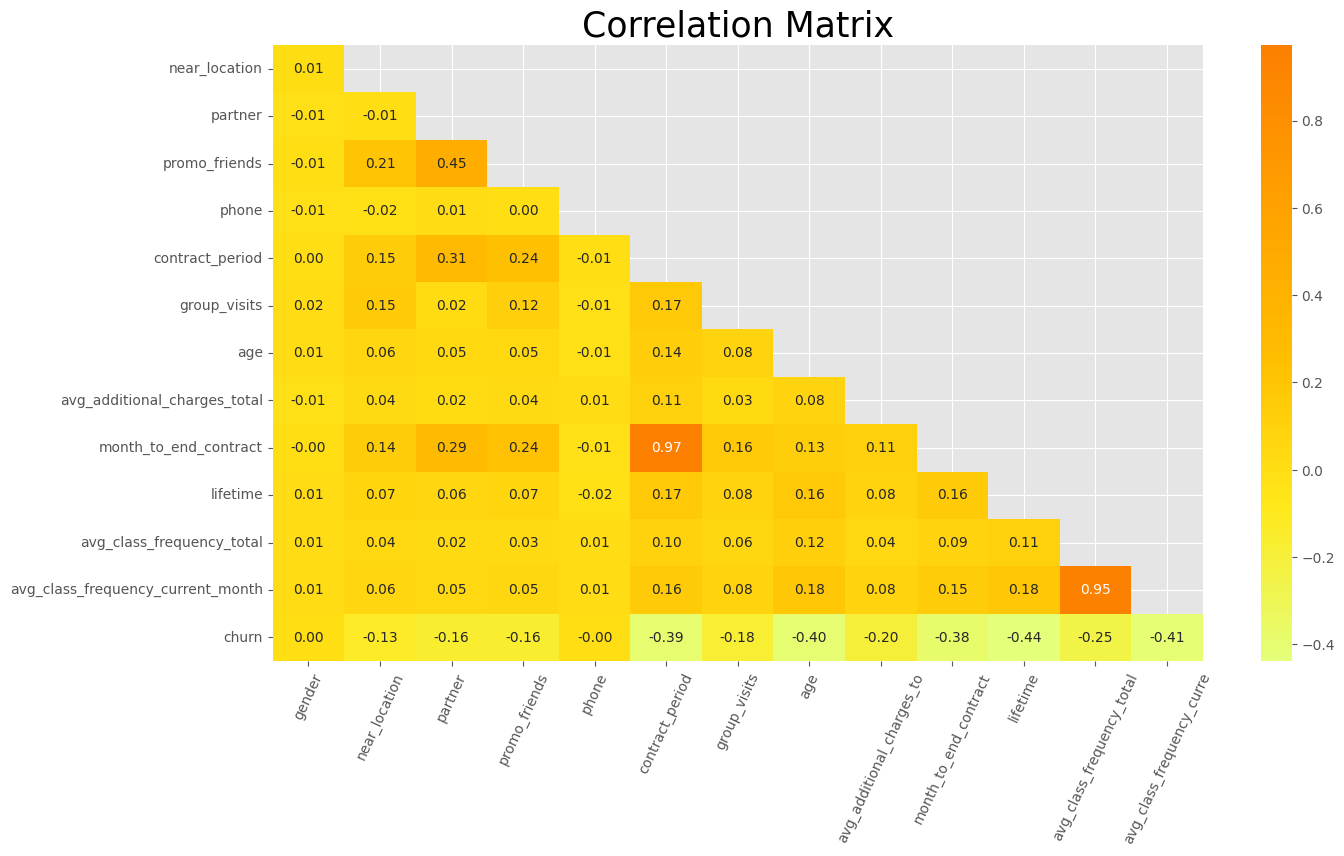

In [17]:
# Membuat heatmap dari matriks korelasi
fig, ax = plt.subplots(figsize=(15, 8))

#menyembunyikan setengah bagian atas dari heatmap
mask = np.triu(np.ones_like(eda.corr(), dtype=np.bool))

sns.heatmap(eda.corr(), annot=True, cmap='Wistia', mask=mask, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, 1)
ax.tick_params(labelsize=10)
left, right = ax.get_xlim()
ax.set_xlim(left, right - 1)
ax.set_xticklabels([i.get_text()[:25] for i in ax.get_xticklabels()])
ax.tick_params(axis='x', labelrotation=65)
plt.title("Correlation Matrix",fontsize=25)
plt.show()


**Kesimpulan :**

Kami menemukan bahwa ada hubungan yang kuat antara beberapa faktor dengan kemungkinan seorang pelanggan untuk berhenti menggunakan layanan gym. Kami menyadari bahwa **semakin lama seseorang menjadi anggota pusat kebugaran, semakin kecil kemungkinannya untuk berhenti langganan**. Selain itu, usia juga memainkan peran penting dalam peluang pelanggan untuk berhenti langganan. **Semakin tua usia seorang pelanggan, semakin kecil kemungkinan bagi mereka untuk berhenti langganan layanan gym**.

Ada kemungkinan bahwa pusat kebugaran memiliki **program "ajak teman" yang terintegrasi dengan program mitra**. Dalam hal ini, pelanggan yang diajak oleh teman mereka untuk bergabung dengan pusat kebugaran (promo_friends) mungkin juga cenderung berada dalam kelompok pelanggan yang berasal dari perusahaan mitra (partner)

Terdapat gejala **multikolinearitas** yang tinggi antara variabel **Month_to_end_contract** dengan variabel **Contract_period**. Korelasi yang sangat tinggi mengindikasikan bahwa variabel **Month_to_end_contract** dan **Contract_period** memiliki informasi yang hampir identik. Keduanya mencerminkan informasi tentang durasi kontrak pelanggan, tetapi dalam bentuk yang berbeda. **Contract_period** menunjukkan berapa lama kontrak dibuat dalam bulan (misalnya, 3 bulan, 6 bulan, dst.), sementara **Month_to_end_contract** menunjukkan berapa bulan lagi kontrak akan berakhir.

# **Tahap 4. Membangun Model untuk Memprediksi Churn Pelanggan**

Kami akan membuat suatu model prediktif untuk memprediksi pelanggan-pelanggan yang memiliki peluang untuk berhenti berlangganan di bulan depan

In [18]:
pred = eda.copy()

## **Membagi Data Menjadi *Data Training* Dan *Data Validation***

In [19]:
# Memisahkan variabel independen (fitur) dan variabel dependen (target) dari suatu dataset
X = pred.drop(['churn', 'avg_class_frequency_current_month', 'contract_period'] , axis = 1)
y = pred['churn']

In [20]:
from sklearn.model_selection import cross_val_score
# Menciptakan model Regresi Logistik
rl_model = LogisticRegression(random_state=0, max_iter=480)

# Daftar proporsi ukuran test set yang akan diuji
test_sizes = np.arange(0.1, 0.6, 0.1)

# Membuat list untuk menyimpan skor validasi silang
cv_scores = []

# Melakukan validasi silang untuk setiap ukuran test set
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    scores = cross_val_score(rl_model, X_train, y_train, cv=5)  # Melakukan validasi silang dengan 5 lipatan
    cv_scores.append(np.mean(scores))

# Menampilkan hasil skor validasi silang untuk setiap ukuran test set
for i, test_size in enumerate(test_sizes):
    print(f"Test Size: {test_size:.1f}, Cross-Validation Score: {cv_scores[i]:.4f}")

Test Size: 0.1, Cross-Validation Score: 0.8989
Test Size: 0.2, Cross-Validation Score: 0.8969
Test Size: 0.3, Cross-Validation Score: 0.8935
Test Size: 0.4, Cross-Validation Score: 0.8950
Test Size: 0.5, Cross-Validation Score: 0.8970


**Kesimpulan :**

Test Size: 0.1, Cross-Validation Score: 0.8989:

Menunjukkan bahwa ketika ukuran test set adalah 10% dari seluruh data (90% digunakan sebagai data pelatihan), rata-rata skor validasi silang yang diperoleh adalah sekitar 0.8989. Artinya, model memiliki kinerja yang baik dalam memprediksi dengan ukuran test set ini.

In [21]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## **Menguji Algoritma Model**

### **Regresi Logistik**

Regresi logistik diaplikasikan untuk memprediksi probabilitas seorang pelanggan akan churn berdasarkan fitur-fitur yang ada pada dataset. Dalam model Regresi Logistik, output berupa probabilitas prediksi untuk setiap sampel dalam dataset pengujian.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

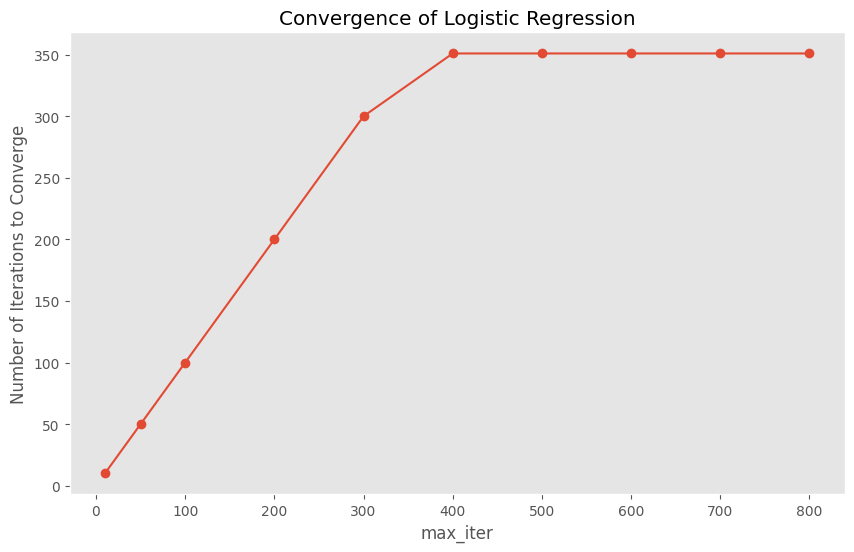

In [22]:
# Mencari tingkat konvergensi model Regresi Logistik dengan variasi nilai max_iter
max_iter_values = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800]
converge_iterations = []

# Pelatihan dan pelacakan konvergensi
for max_iter in max_iter_values:
    rl_model = LogisticRegression(random_state=0, max_iter=max_iter)
    rl_model.fit(X_train, y_train)
    converge_iterations.append(rl_model.n_iter_)

# Plotting grafik konvergen
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, converge_iterations, marker='o')
plt.title('Convergence of Logistic Regression')
plt.xlabel('max_iter')
plt.ylabel('Number of Iterations to Converge')
plt.grid()
plt.show()

**Kesimpulan :**

Nilai max_iter akan diatur menjadi 480. Keputusan ini didasarkan pada grafik yang menunjukkan bahwa setelah mencapai nilai 400, garis pada grafik tampak datar. Dengan kata lain, algoritma optimisasi akan berjalan hingga mencapai konvergensi atau sebanyak 400 iterasi, tergantung pada mana yang terjadi lebih awal.

In [23]:
# menetapkan model algoritma regresi logistik sebagai model pengujian
rl_model = LogisticRegression(random_state=0, max_iter=480)

In [24]:
# Melatih model Regresi Logistik
rl_model.fit(X_train, y_train)

LogisticRegression(max_iter=480, random_state=0)

In [25]:
# Melakukan prediksi dengan menggunakan model yang telah dilatih
y_pred = rl_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [26]:
total_rows = len(y_pred)
print("Total rows y_pred:", total_rows)

Total rows y_pred: 400


In [27]:
# Menghitung probabilitas prediksi bahwa suatu sampel termasuk dalam kelas positif (churn)
y_prob = rl_model.predict_proba(X_test)[:, 1] # Memperoleh probabilitas untuk kelas positif (kelas 1) saja
y_prob

array([2.08179458e-03, 9.59763745e-01, 5.49470920e-01, 8.20310872e-01,
       4.18334940e-02, 5.44001286e-03, 3.62224183e-02, 9.02514029e-04,
       8.51200174e-01, 6.95733761e-03, 2.14710449e-03, 3.21820872e-01,
       1.62697556e-01, 2.27677612e-01, 1.38552058e-02, 6.56899774e-01,
       1.22532665e-01, 9.00847931e-07, 8.20729573e-01, 1.47662790e-01,
       3.18555814e-01, 9.73492457e-04, 1.61765657e-03, 9.81766263e-03,
       4.97910009e-02, 6.58019979e-01, 7.89897821e-02, 1.00150688e-01,
       8.17131745e-02, 2.26464590e-03, 6.28262751e-07, 5.01085843e-02,
       4.00054484e-02, 4.28979260e-01, 4.71093350e-02, 1.71621036e-02,
       3.53203943e-04, 2.18741785e-03, 3.20074954e-04, 6.83229593e-02,
       1.33148150e-03, 8.57578895e-03, 5.52083872e-05, 5.38338681e-04,
       1.10123032e-02, 6.75058453e-01, 1.85784233e-01, 2.52802525e-03,
       9.18730263e-01, 9.08675480e-01, 6.34742360e-01, 1.13947048e-02,
       7.19760008e-03, 9.50106666e-03, 4.58842433e-08, 8.42720016e-01,
      

In [28]:
total_rows = len(y_prob)
print("Total rows y_prob:", total_rows)

Total rows y_prob: 400


**Kesimpulan :**

* **Nilai probabilitas pertama: 0.00207546959** yang berarti model memprediksi dengan probabilitas sekitar 0.21% bahwa sampel pertama termasuk dalam kelas positif (churn).
* **Nilai probabilitas kedua: 0.958615013** menunjukkan bahwa model memprediksi dengan probabilitas sekitar 95.86% bahwa sampel kedua termasuk dalam kelas positif (churn).

* **Nilai probabilitas ketiga: 0.548844673** berarti model memprediksi dengan probabilitas sekitar 54.88% bahwa sampel ketiga termasuk dalam kelas positif (churn).

Dan seterusnya untuk setiap sampel dalam dataset pengujian.

Dalam konteks kasus ini, probabilitas tersebut bisa diartikan sebagai tingkat keyakinan model bahwa suatu sampel akan termasuk dalam kelas positif (churn). Nilai probabilitas yang lebih tinggi menunjukkan tingkat keyakinan yang lebih tinggi bahwa sampel tersebut adalah kasus churn. Sedangkan nilai probabilitas yang lebih rendah menunjukkan bahwa model kurang yakin bahwa sampel tersebut akan termasuk dalam kelas positif (churn).

Selanjutnya, kami akan menetapkan ambang batas, yaitu suatu nilai yang ditetapkan untuk memutuskan apakah suatu sampel akan dianggap sebagai kelas positif (churn) atau kelas negatif (tidak churn). Dalam kasus ini, nilai ambang batas (threshold) ditetapkan sebesar 0,5. Ini berarti jika probabilitas prediksi suatu sampel lebih besar dari 0.5, maka sampel tersebut akan dianggap sebagai kelas positif (churn), sementara jika probabilitasnya kurang dari atau sama dengan 0.5, maka sampel tersebut akan dianggap sebagai kelas negatif (tidak churn).

In [29]:
# Menetapkan ambang batas
threshold = .40

# Melakukan iterasi, jika probabilitas prediksi kurang dari atau sama dengan threshold, maka prediksi akan diatur sebagai 0
y_pred_40 = [0 if i < threshold else 1 for i in y_prob]
y_pred_40

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [30]:
total_rows = len(y_pred_40)
print("Total rows y_pred_40:", total_rows)

Total rows y_pred_40: 400


In [31]:
print('Matriks Akurasi Regresi Logistik Menggunakan Threshold 50% :')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_prob)))

Matriks Akurasi Regresi Logistik Menggunakan Threshold 50% :

Accuracy: 0.90
Precision: 0.80
Recall: 0.80
F1: 0.80
ROC_AUC: 0.95


In [32]:
print('Matriks Akurasi Regresi Logistik Menggunakan Threshold 40%:')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_40)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_40)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_40)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_40)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Matriks Akurasi Regresi Logistik Menggunakan Threshold 40%:

Accuracy: 0.90
Precision: 0.77
Recall: 0.85
F1: 0.81
ROC_AUC: 0.87


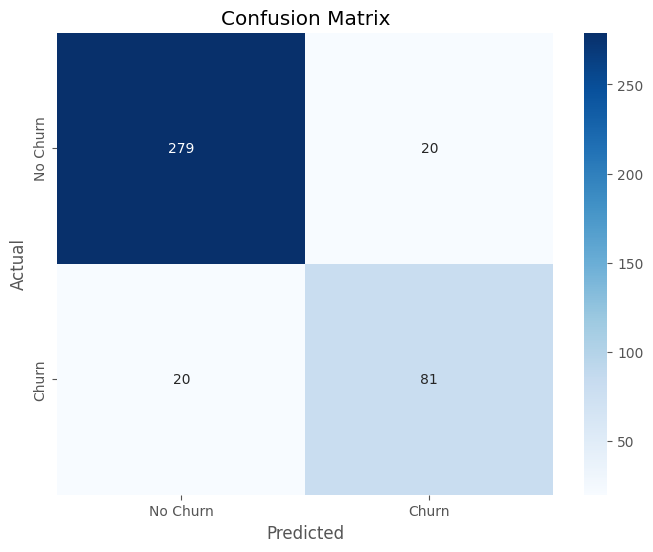

In [33]:
# # Membuat confusion matrix dari y_pred (tanpa threshold)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

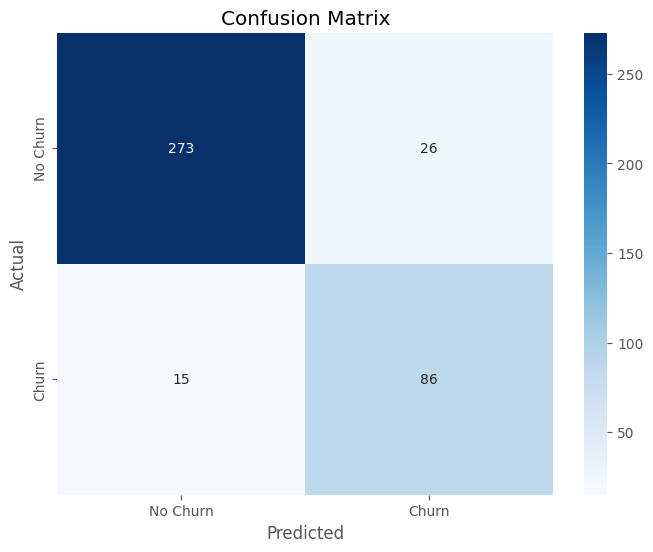

In [34]:
# Membuat confusion matrix dari y_pred_40 (threshold)
cm = confusion_matrix(y_test, y_pred_40)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Kesimpulan :**

**Tanpa Menggunakan Threshold):**
- **Akurasi (Accuracy): 0.90**
  Nilai akurasi mencerminkan proporsi prediksi yang benar secara keseluruhan. Dalam kasus ini, model berhasil memprediksi dengan benar sekitar 90% dari seluruh data pengujian.

- **Presisi (Precision): 0.80**
  Nilai presisi 0.80 menunjukkan bahwa dari semua prediksi yang dinyatakan sebagai positif (churn) oleh model, sekitar 80% di antaranya adalah benar-benar positif.

- **Recall: 0.80**
  Nilai recall 0.80 mengindikasikan bahwa model berhasil mengenali sekitar 80% dari semua instance positif yang ada dalam dataset.

- **F1 Score: 0.80**
  F1 score adalah rata-rata harmonik antara presisi dan recall. Nilai 0.80 menunjukkan keseimbangan yang baik antara presisi dan recall dalam model ini.

- **ROC AUC Score: 0.95**
  Skor ROC AUC yang tinggi, 0.95, menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif.

**Dengan Menggunakan Threshold 40%):**
- **Akurasi (Accuracy): 0.90**
  Nilai akurasi tetap sama dengan sebelumnya, yaitu sekitar 90%, karena threshold hanya mempengaruhi bagaimana prediksi diperoleh dari probabilitas.

- **Presisi (Precision): 0.77**
  Nilai presisi turun menjadi 0.77 karena menggunakan threshold lebih rendah mengakibatkan lebih banyak prediksi positif, yang menyertakan beberapa false positive.

- **Recall: 0.85**
  Nilai recall meningkat menjadi 0.85, mengindikasikan bahwa model mampu mengenali sekitar 85% dari seluruh instance positif yang ada dalam dataset.

- **F1 Score: 0.81**
  Nilai F1 score juga mengalami peningkatan, mencapai 0.81, menunjukkan keseimbangan yang lebih baik antara presisi dan recall dibandingkan sebelumnya.

- **ROC AUC Score: 0.87**
  Skor ROC AUC menurun sedikit menjadi 0.87 karena threshold yang lebih rendah mempengaruhi kurva ROC.

Secara keseluruhan, dengan menggunakan threshold 40%, model memiliki **recall** yang lebih tinggi, yang berarti model akan lebih baik dalam mengenali pelanggan yang berpotensi churn. Namun, ini juga diimbangi dengan sedikit penurunan dalam **presisi** dan **ROC AUC**.

### **Random Forest**

In [35]:
# menetapkan model algoritma Random Forest sebagai model pengujian
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)

In [36]:
# Melatih model Regresi Logistik
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
# Melakukan prediksi dengan menggunakan model yang telah dilatih
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [38]:
# Menghitung probabilitas prediksi bahwa suatu sampel termasuk dalam kelas positif (churn)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1] # Memperoleh probabilitas untuk kelas positif (kelas 1) saja
y_prob_rf

array([0.01, 0.94, 0.18, 0.95, 0.16, 0.03, 0.01, 0.01, 0.9 , 0.01, 0.01,
       0.17, 0.03, 0.09, 0.03, 0.62, 0.05, 0.  , 0.69, 0.04, 0.23, 0.  ,
       0.01, 0.1 , 0.09, 0.29, 0.18, 0.05, 0.27, 0.03, 0.  , 0.05, 0.12,
       0.54, 0.13, 0.04, 0.  , 0.  , 0.04, 0.2 , 0.01, 0.01, 0.  , 0.  ,
       0.05, 0.69, 0.23, 0.04, 0.97, 0.91, 0.35, 0.01, 0.01, 0.11, 0.06,
       0.6 , 0.07, 0.43, 0.94, 0.01, 0.97, 0.85, 0.08, 0.34, 0.  , 0.01,
       0.  , 0.  , 0.09, 0.06, 0.01, 0.  , 0.04, 0.05, 0.  , 0.  , 0.95,
       0.32, 0.92, 0.02, 0.49, 0.04, 0.  , 0.06, 0.09, 0.79, 0.97, 0.07,
       0.03, 0.03, 0.02, 0.  , 0.69, 0.03, 0.  , 0.03, 0.15, 0.07, 0.03,
       0.75, 0.12, 0.49, 0.95, 0.21, 0.  , 0.  , 0.  , 0.25, 0.98, 0.06,
       0.  , 0.05, 0.93, 0.33, 0.61, 0.02, 0.05, 0.82, 0.  , 0.05, 0.  ,
       0.02, 0.  , 0.54, 0.94, 0.02, 0.21, 0.  , 0.97, 0.  , 0.65, 0.13,
       0.78, 0.  , 0.01, 0.31, 0.08, 0.47, 0.97, 0.46, 0.83, 0.94, 0.01,
       0.55, 0.02, 0.63, 0.46, 0.98, 0.22, 0.34, 0.

In [39]:
print('Matriks Akurasi Random Forest :')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_prob_rf)))

Matriks Akurasi Random Forest :

Accuracy: 0.91
Precision: 0.88
Recall: 0.75
F1: 0.81
ROC_AUC: 0.94


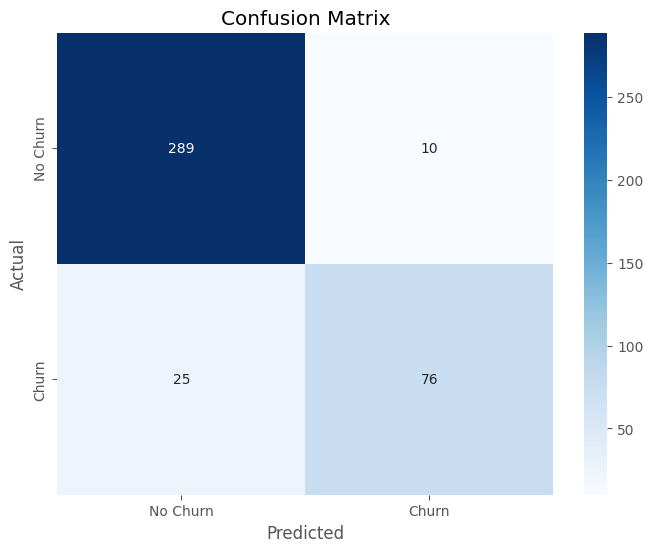

In [40]:
# Membuat confusion matrix dari model prediksi random forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Kesimpulan :**

Secara keseluruhan, model **Random Forest** memiliki **akurasi** yang sedikit lebih tinggi dan **presisi** yang lebih tinggi dibandingkan **Regresi Logistik**. Namun, **Regresi logistik** memiliki **recall** yang lebih tinggi, yang berarti lebih baik dalam mengenali pelanggan yang berpotensi churn. Untuk itu pemilihan model yang akan kami gunakan untuk memprediksi probabilitas churn pelanggan yaitu menggunakan pendekatan **Random Forest**

In [41]:
fix_model = rf_model
fix_model

RandomForestClassifier(random_state=0)

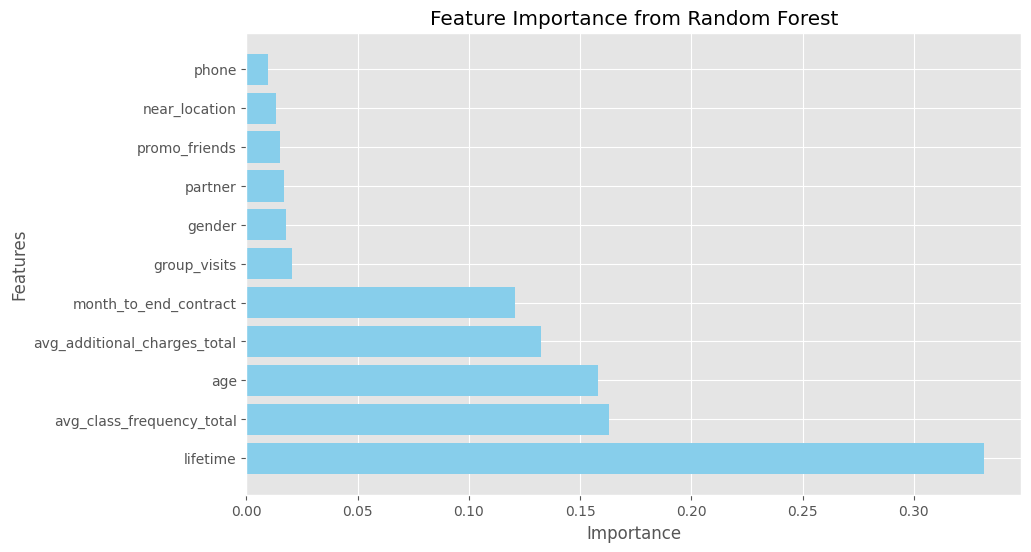

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Membuat objek model Random Forest
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)

# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)

# Mengambil pentingnya fitur dari model
feature_importances = rf_model.feature_importances_

# Membuat DataFrame untuk menyimpan informasi pentingnya fitur
fi_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Mengurutkan fitur berdasarkan pentingnya
fi_df = fi_df.sort_values(by='importance', ascending=False)

# Menampilkan grafik bar untuk visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


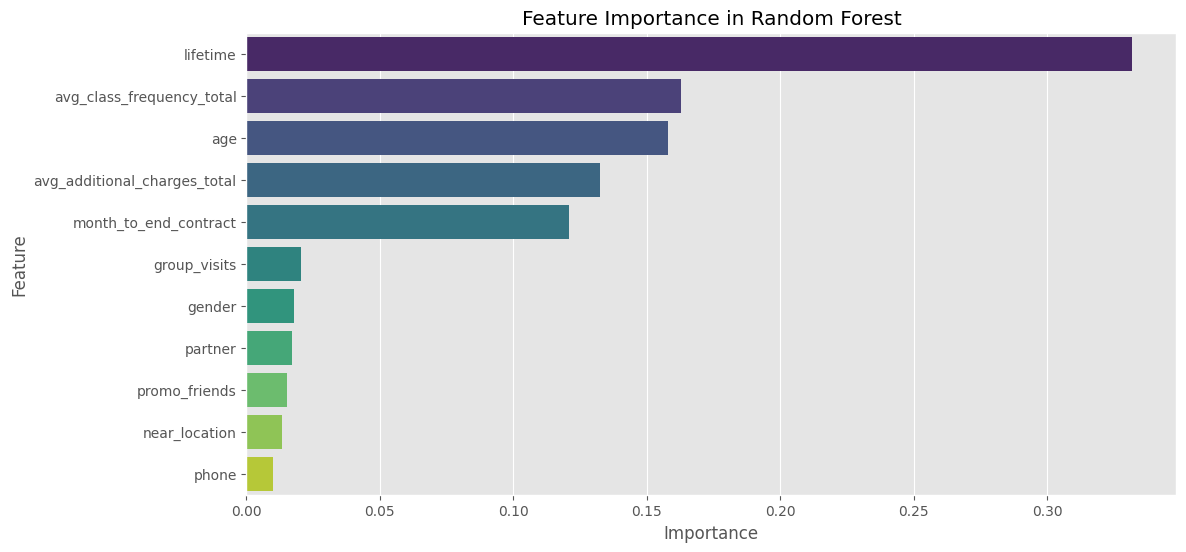

In [43]:
# Menetapkan model algoritma Random Forest sebagai model pengujian
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Mengambil pentingnya setiap fitur dari model
feature_importances = rf_model.feature_importances_

# Membuat DataFrame untuk menampung data pentingnya fitur
fi_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Mengurutkan DataFrame berdasarkan pentingnya fitur
fi_df = fi_df.sort_values('importance', ascending=False)

# Membuat grafik bar untuk menampilkan pentingnya fitur
plt.figure(figsize=(12, 6))
sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Hasil output menunjukkan bahwa fitur-fitur dengan tingkat penting tertinggi dalam model Random Forest untuk melakukan prediksi adalah sebagai berikut:

1. **Lifetime:**
Fitur ini adalah yang paling penting menurut model. Ini menunjukkan berapa lama pelanggan telah menjadi anggota pusat kebugaran. Semakin lama pelanggan menjadi anggota, semakin tinggi kemungkinannya untuk tetap berlangganan.

2. **Avg_class_frequency_total:**
Fitur ini menggambarkan rata-rata frekuensi kunjungan pelanggan ke pusat kebugaran sepanjang masa keanggotaannya. Semakin sering pelanggan mengunjungi, semakin tinggi kemungkinannya untuk tetap berlangganan.

3. **Age:**
Usia pelanggan memiliki *feature importance* yang cukup tinggi, yang mengindikasikan bahwa usia juga memainkan peran penting dalam mempengaruhi keputusan churn.

4. **Avg_additional_charges_total:**
Fitur ini menghitung total biaya tambahan yang dikeluarkan pelanggan untuk layanan di pusat kebugaran, seperti kafe, perlengkapan olahraga, kosmetik, dan lainnya. Pelanggan yang menghabiskan lebih banyak pada layanan tambahan mungkin memiliki ikatan yang lebih kuat dengan pusat kebugaran.

5. **Month_to_end_contract:**
Fitur ini menunjukkan berapa bulan tersisa sebelum kontrak pelanggan berakhir. Pelanggan dengan kontrak yang hampir berakhir mungkin lebih cenderung untuk churn, karena ada kemungkinan mereka tidak akan memperpanjang kontrak mereka.

# **Tahap 5. Membuat Kluster Pelanggan**

## **Standarisasi Data**

In [44]:
clust = pred.copy()

In [45]:
clust

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


In [46]:
# Mengambil hanya fitur-fitur tertentu
clust_features = ['lifetime', 'avg_class_frequency_total', 'age', 'avg_additional_charges_total',
                  'month_to_end_contract', 'group_visits', 'gender', 'partner', 'promo_friends',
                  'near_location', 'phone', 'churn']

# Membuat DataFrame baru hanya dengan fitur-fitur yang dimaksud
clust = pred[clust_features]
clust

,lifetime,avg_class_frequency_total,age,avg_additional_charges_total,month_to_end_contract,group_visits,gender,partner,promo_friends,near_location,phone,churn
0,3,0.020398,29,14.227470,5,1,1,1,1,1,0,0
1,7,1.922936,31,113.202938,12,1,0,0,0,1,1,0
2,2,1.859098,28,129.448479,1,0,0,1,0,1,1,0
3,2,3.205633,33,62.669863,12,1,0,1,1,1,1,0
4,3,1.113884,26,198.362265,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8,2.284497,33,2.406023,12,0,1,1,0,1,1,0
3996,1,1.277168,29,68.883764,1,1,0,0,0,1,1,1
3997,2,2.786146,28,78.250542,11,0,1,1,1,1,1,0
3998,3,1.630108,32,61.912657,5,0,0,1,1,1,1,0


In [47]:
# Standarisasi data dimana mean sekitar 0 dan varians sekitar 1
ss = StandardScaler()
df_stand = ss.fit_transform(clust)
df_stand

array([[-0.19332863, -1.91191971, -0.0565538 , ...,  0.42788074,
        -3.05985201, -0.6008387 ],
       [ 0.87368001,  0.04517569,  0.55732732, ...,  0.42788074,
         0.32681319, -0.6008387 ],
       [-0.46008079, -0.02049263, -0.36349436, ...,  0.42788074,
         0.32681319, -0.6008387 ],
       ...,
       [-0.46008079,  0.93313947, -0.36349436, ...,  0.42788074,
         0.32681319, -0.6008387 ],
       [-0.19332863, -0.25604937,  0.86426788, ...,  0.42788074,
         0.32681319, -0.6008387 ],
       [-0.72683295, -0.79947418,  0.25038676, ..., -2.33709981,
        -3.05985201, -0.6008387 ]])

In [48]:
# Membuat matriks jarak antara semua titik data
df_matrix = linkage(df_stand, method='ward')
df_matrix

array([[7.13000000e+02, 2.03300000e+03, 1.27048830e-02, 2.00000000e+00],
       [7.93000000e+02, 3.20500000e+03, 5.90387924e-02, 2.00000000e+00],
       [7.50000000e+01, 1.64600000e+03, 6.49761004e-02, 2.00000000e+00],
       ...,
       [7.99100000e+03, 7.99200000e+03, 8.17751770e+01, 1.29400000e+03],
       [7.98800000e+03, 7.99500000e+03, 8.99416860e+01, 2.70600000e+03],
       [7.99600000e+03, 7.99700000e+03, 1.05083129e+02, 4.00000000e+03]])

In [ ]:
# membuat Dendogram
plt.figure(figsize=(15, 10))
dendrogram(df_matrix, orientation='top')
plt.title('Pengelompokan Hierarki Untuk Pelanggan')
plt.show()

**Kesimpulan :**

Berdasarkan analisis dendrogram, disarankan untuk membentuk 5 kelompok sebagai jumlah kelompok optimal. Rekomendasi ini diperoleh dengan memperhatikan variasi warna yang berbeda pada dendrogram.

## **Klustering Menggunakan KMeans**

In [ ]:
# Inisialisasi model K-Means dengan jumlah kluster yang diinginkan
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering
kmeans.fit(df_stand)

# Simpan model K-Means ke dalam file
joblib.dump(kmeans, 'kmeans_model.pkl')

# Prediksi kluster untuk data
label = kmeans.predict(df_stand)
clust['cust_cluster'] = label
clust

In [ ]:
# menguji tingkat skor pemisahan dari hasil klasterisasi
print('Silhouette_score: {:.2f}'.format(silhouette_score(df_stand, label)))

**Kesimpulan :**

Nilai silhouette score sebesar 0.14 mengindikasikan bahwa pengelompokan data memiliki beberapa masalah dalam memisahkan kelompok-kelompok yang berbeda dengan baik.

In [ ]:
# Inisialisasi klaster dan nama fitur
clusters = clust['cust_cluster'].unique()
features = ['lifetime', 'avg_class_frequency_total', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
            'group_visits', 'gender', 'partner', 'promo_friends', 'near_location', 'phone']

# Membuat subplot untuk setiap fitur
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))

for i, feature in enumerate(features[:10]):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    if i < 5:
        sns.boxplot(x='cust_cluster', y=feature, data=clust, ax=ax)
        ax.set_title(f'Boxplot {feature} by Cluster')
    else:
        cluster_median = clust.groupby('cust_cluster')[feature].median().reset_index()
        sns.barplot(x='cust_cluster', y=feature, data=cluster_median, ax=ax)
        ax.set_title(f'Bar Chart {feature} by Cluster (Mean)')

    ax.set_xlabel('Cluster')
    ax.set_ylabel('Value')

# Menampilkan subplot
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung nilai rata-rata tiap fitur berdasarkan klaster
clust.groupby('cust_cluster').median().round(2)

1. **Kluster 0: Loyalitas Stabil**
    - Pelanggan dalam kelompok ini memiliki lifetime yang tinggi dan frekuensi kunjungan yang stabil
    - Pelanggan cenderung berusia 30 tahunan dan mengeluarkan biaya tambahan yang tinggi
    - Mereka memiliki durasi kontrak yang akan segera berakhir dalam 1 bulan kedepan
    - Sebagian besar pelanggan bukan karyawan perusahaan mitra dan juga tidak mendaftar melalui program "ajak teman"
    - Tingkat churn rendah menunjukkan loyalitas mereka terhadap pusat kebugaran


2. **Kluster 1: Aktif & Terikat**
    - Pelanggan dalam kelompok ini juga aktif dengan frekuensi kunjungan yang tinggi
    - Mereka memiliki karakteristik serupa dengan Kluster 0 dalam hal usia dan biaya tambahan
    - Kontrak mereka umumnya lebih lama, menunjukkan keterikatan yang kuat terhadap pusat kebugaran
    - Pelanggan cenderung bukan karyawan perusahaan mitra dan juga tidak mendaftar melalui program "ajak teman"
    - Tingkat churn mereka juga terbilang rendah menunjukkan loyalitas mereka terhadap pusat kebugaran

3. **Kluster 2: Pemula Pengejar Diskon**
    - Kelompok ini terdiri dari pelanggan yang relatif baru dan lebih muda
    - Mereka cenderung mendaftar melalui program diskon mitra
    - Biaya tambahan yang dikeluarkan juga sangat rendah dibanding klaster pelanggan lain
    - Memerlukan strategi untuk menjaga mereka tetap terlibat dikarenakan tingkat churn mereka tinggi
   
4. **Kluster 3: Konsisten Tetap Aktif**
    - Pelanggan dalam kelompok ini tetap aktif dengan frekuensi kunjungan yang cukup rendah
    - Mereka cenderung lebih tua dan mengeluarkan biaya tambahan yang cukup tinggi
    - Tingkat churn rendah menunjukkan konsistensi mereka dalam menjaga kebugaran meskipun lokasi mereka sendiri relatif jauh terhadap pusat kebugaran

5. **Kluster 4: Setia & Merekomendasikan**
    - Pelanggan dalam kelompok ini adalah pelanggan setia dengan kontrak paling panjang
    - Kelompok pelanggan ini merupakan cenderung merupakan karyawan-karyawan dari perusahaan yang bermitra dengan pusat kebugaran
    - Oleh sebab itu, mereka cenderung mengambil bagian dalam sesi kelompok, aktif merekomendasikan kepada rekan-rekan mereka, dan memiliki tingkat churn yang rendah.
    - Kelompok yang paling potensial untuk merekomendasikan pusat kebugaran kepada orang lain

# **Tahap 6. Kesimpulan Umum**

1. **Feature Importance:** Model Random Forest menunjukkan bahwa beberapa fitur memiliki pengaruh yang lebih besar terhadap keputusan churn pelanggan. Fitur-fitur ini mencakup Lifetime (lama keanggotaan), Avg_class_frequency_total (frekuensi kunjungan), Age (usia), Avg_additional_charges_total (biaya tambahan), dan Month_to_end_contract (sisa masa kontrak). Oleh karena itu, strategi retensi pelanggan harus berfokus pada aspek-aspek ini.

2. **Kluster Analisis:**
    - **Kluster 0** dan **kluster 1** memiliki karakteristik yang mirip dan cenderung menjadi pelanggan yang lebih setia dengan tingkat churn rendah. Manajemen dapat fokus mempertahankan pelanggan dalam kelompok ini dengan menawarkan lebih banyak program sesi kelompok atau promosi.

    - **Kluster 2** memiliki tingkat churn yang tinggi. Manajemen perlu melakukan evaluasi lebih lanjut untuk memahami mengapa pelanggan dalam kelompok ini cenderung meninggalkan pusat kebugaran. Mungkin diperlukan strategi pemasaran khusus atau peningkatan pelayanan.

    - **Kluster 3** memiliki tingkat churn yang rendah meskipun frekuensi kunjungan yang rendah dan jarak yang cukup jauh dengan lokasi pusat kebugaran. Mungkin ada faktor lain yang membuat pelanggan tetap, seperti durasi keanggotaan mereka yang terbilang relatif masih baru.

    - **Kluster 4** adalah kelompok dengan kontrak paling panjang dan memiliki tingkat churn rendah. Manajemen dapat melihat keberhasilan strategi "ajak teman" dalam kelompok ini dan mencoba menerapkannya pada kelompok lain untuk meningkatkan retensi pelanggan.

3. **Rekomendasi untuk Manajemen:**
   - **Kluster 0 dan 1:** Fokus pada mempertahankan pelanggan dalam kelompok ini dengan meningkatkan layanan sesi kelompok dan promosi yang sesuai dengan profil mereka.
   - **Kluster 2:** Perlu dilakukan evaluasi mendalam untuk memahami alasan tingkat churn yang tinggi. Mungkin diperlukan peningkatan pelayanan atau strategi pemasaran yang lebih efektif.
   - **Kluster 3:** Meskipun frekuensi kunjungan rendah, kelompok ini memiliki tingkat churn rendah. Mungkin ada faktor lain yang membuat mereka tetap, jadi perlu dianalisis lebih lanjut.
   - **Kluster 4:** Terapkan strategi "ajak teman" yang berhasil dalam kelompok ini pada kelompok lain untuk meningkatkan retensi pelanggan.

Dalam mengembangkan strategi retensi pelanggan, penting untuk memahami bahwa faktor-faktor seperti lama keanggotaan, frekuensi kunjungan, dan profil pelanggan (usia, biaya tambahan) memainkan peran penting dalam mengurangi churn. Analisis kluster membantu dalam mengidentifikasi segmen pelanggan yang berbeda dan merancang tindakan yang sesuai untuk setiap segmen. Selain itu, manajemen perlu terus memantau data pelanggan untuk memastikan bahwa strategi retensi berjalan dengan baik dan dapat disesuaikan sesuai kebutuhan.